In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import from_networkx
from torch_geometric.utils.convert import to_networkx

graph_s = nx.read_gml("./datasets/1PLW/raw/1PLW_graph.gml")
graph_t = nx.read_gml("./datasets/1PLW/raw/1PLW_fold_graph.gml")

data_s = from_networkx(graph_s, group_edge_attrs=["weight"])
data_t = from_networkx(graph_t, group_edge_attrs=["weight"])


def draw_graph(G):
    plt.figure(figsize=(4, 4))
    nx.draw(G, with_labels=True, node_color="lightblue", node_size=50, font_weight="bold")
    plt.show()


def draw_data(data):
    G = to_networkx(data, to_undirected=True)
    draw_graph(G)

Source Graph (NMR):
Number of nodes: 25
Number of edges: 264
Average node degree: 10.56

Target Graph (AF):
Number of nodes: 25
Number of edges: 192
Average node degree: 7.68



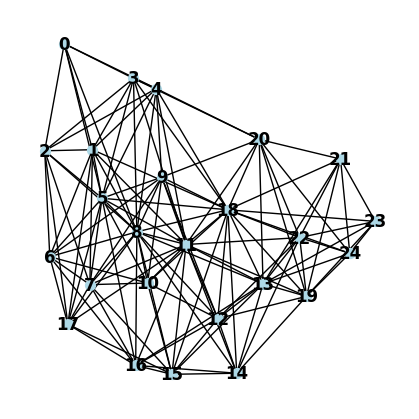

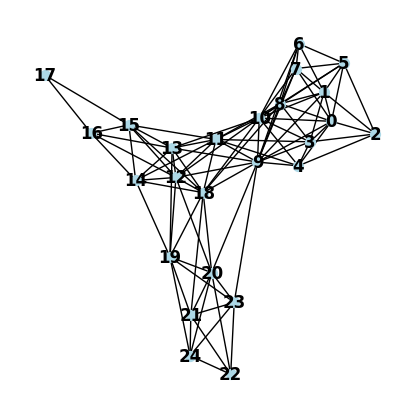

In [2]:
print('=============================================================')
print("Source Graph (NMR):")
print(f'Number of nodes: {data_s.num_nodes}')
print(f'Number of edges: {data_s.num_edges}')
print(f'Average node degree: {data_s.num_edges / data_s.num_nodes:.2f}\n')

print("Target Graph (AF):")
print(f'Number of nodes: {data_t.num_nodes}')
print(f'Number of edges: {data_t.num_edges}')
print(f'Average node degree: {data_t.num_edges / data_t.num_nodes:.2f}\n')

draw_data(data_s)
draw_data(data_t)

In [3]:
data_s

Data(edge_index=[2, 264], chem_shift=[25], chem_shift_error=[25], label=[264], edge_attr=[264, 1], num_nodes=25)

In [4]:
from examples.random_graph import RandomGraphDataset
train_dataset = RandomGraphDataset(25, 0.35)
t = train_dataset[0]
print('=============================================================')
print(f'Number of nodes: {t.num_nodes}')
print(f'Number of edges: {t.num_edges}')
print(f'Average node degree: {t.num_edges / t.num_nodes:.2f}\n')

print(t)

Number of nodes: 25
Number of edges: 234
Average node degree: 9.36

Data(num_nodes=25, edge_attr_s=[234, 1], edge_index_s=[2, 234], y_index_s=[25], num_nodes_s=25, y_t=[25], edge_attr_t=[222, 1], edge_index_t=[2, 222], num_nodes_t=25)


/mnt/data/anatole93dm/miniforge3/envs/graph-nmr/lib/python3.13/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


# NMR Graph 1k

In [2]:
from examples.random_graph import GraphNmrDataset1k
from examples.random_graph import PairData # Needs to be imported for unpickling to work

dataset = GraphNmrDataset1k(root="./datasets/nmr_graphs_1k", force_reload=False)
dataset[1]

/mnt/data/anatole93dm/miniforge3/envs/graph-nmr/lib/python3.13/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


/mnt/data/anatole93dm/miniforge3/envs/graph-nmr/lib/python3.13/site-packages/torch_geometric/io/fs.py:229: UserWarning: Weights only load failed. Please file an issue to make `torch.load(weights_only=True)` compatible in your case. Please use `torch.serialization.add_safe_globals([examples.random_graph.PairData])` to allowlist this global.
  warnings.warn(f"{warn_msg} Please use "


PairData(x_s=[427], edge_index_s=[2, 7594], edge_attr_s=[7594, 1], label_s=[427], y_s=[427], x_t=[757], edge_index_t=[2, 13802], edge_attr_t=[13802, 1], label_t=[757], y_t=[757], protein='1PA4')

## Individual Pair Graph Analysis

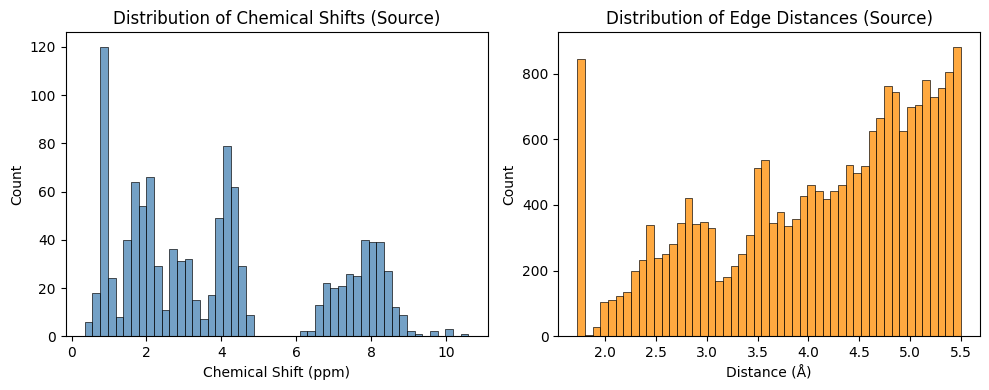

Mean degree: 19.10, Max degree: 35.00


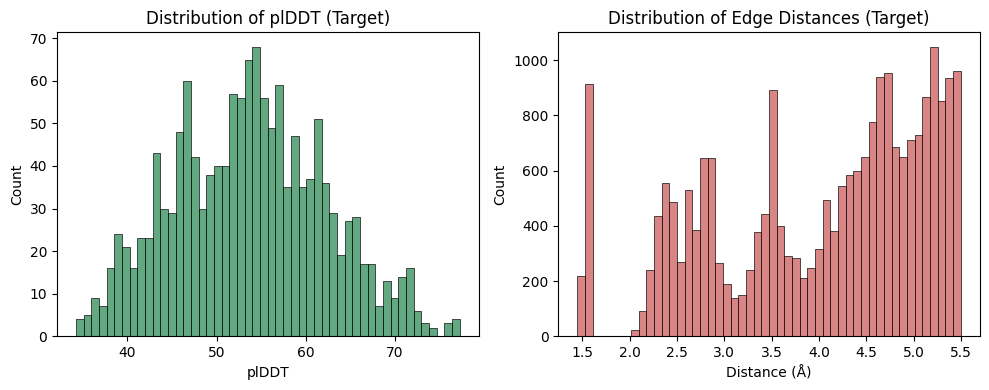

Mean degree: 16.43, Max degree: 32.00


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.utils import degree
import seaborn as sns
from tqdm import tqdm

data = dataset[10]

# 1. Source Graph
def analyze_source_graph(data):
    edge_len = data.edge_attr_s.cpu().numpy().flatten()
    x = data.x_s.cpu().numpy().flatten()

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(x, bins=50, color='steelblue')
    plt.xlabel('Chemical Shift (ppm)')
    plt.title('Distribution of Chemical Shifts (Source)')

    plt.subplot(1,2,2)
    sns.histplot(edge_len, bins=50, color='darkorange')
    plt.xlabel('Distance (Å)')
    plt.title('Distribution of Edge Distances (Source)')
    plt.tight_layout()
    plt.show()

    deg = degree(data.edge_index_s[0], num_nodes=data.x_s.size(0)).numpy()
    print(f"Mean degree: {deg.mean():.2f}, Max degree: {deg.max():.2f}")

analyze_source_graph(data)

# 2. Target Graph
def analyze_target_graph(data):
    edge_len = data.edge_attr_t.cpu().numpy().flatten()
    x = data.x_t.cpu().numpy().flatten()

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(x, bins=50, color='seagreen')
    plt.xlabel('plDDT')
    plt.title('Distribution of plDDT (Target)')

    plt.subplot(1,2,2)
    sns.histplot(edge_len, bins=50, color='indianred')
    plt.xlabel('Distance (Å)')
    plt.title('Distribution of Edge Distances (Target)')
    plt.tight_layout()
    plt.show()

    deg = degree(data.edge_index_t[0], num_nodes=data.x_t.size(0)).numpy()
    print(f"Mean degree: {deg.mean():.2f}, Max degree: {deg.max():.2f}")

analyze_target_graph(data)

## Global Analysis Across all Source and Target Graphs

100%|██████████| 995/995 [00:00<00:00, 8540.59it/s]


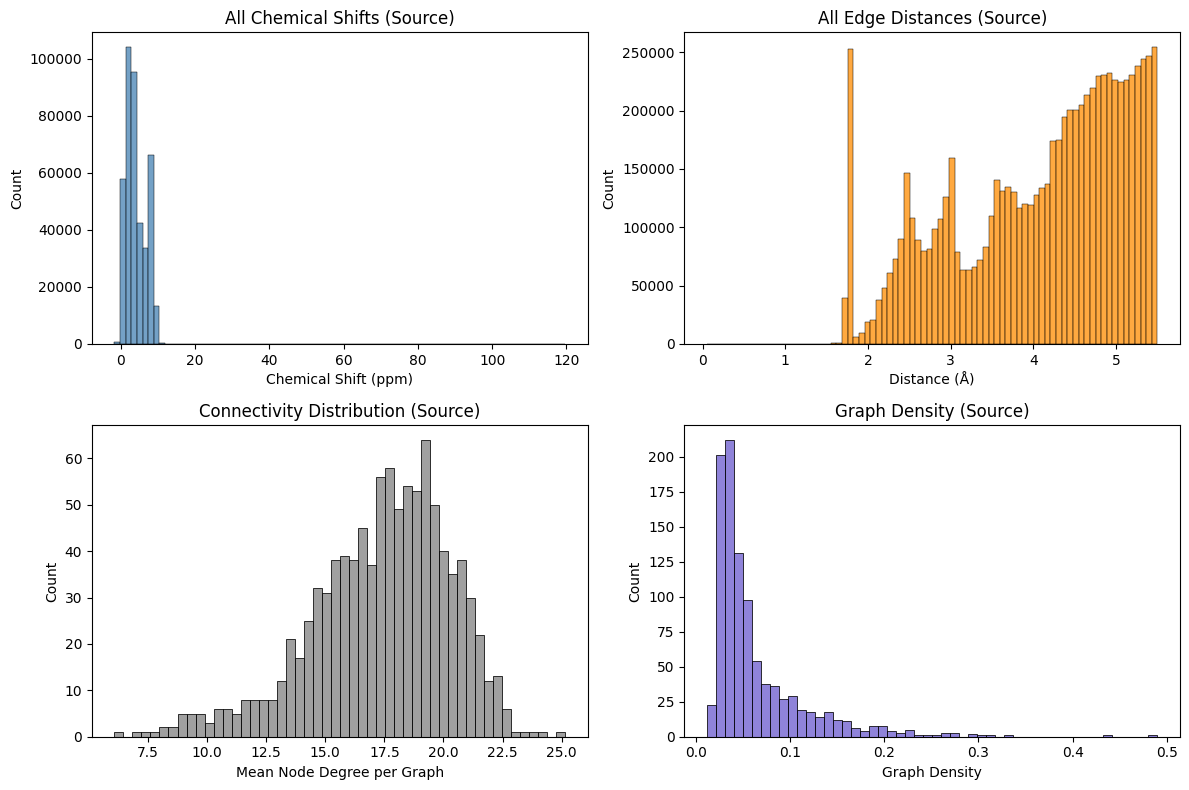

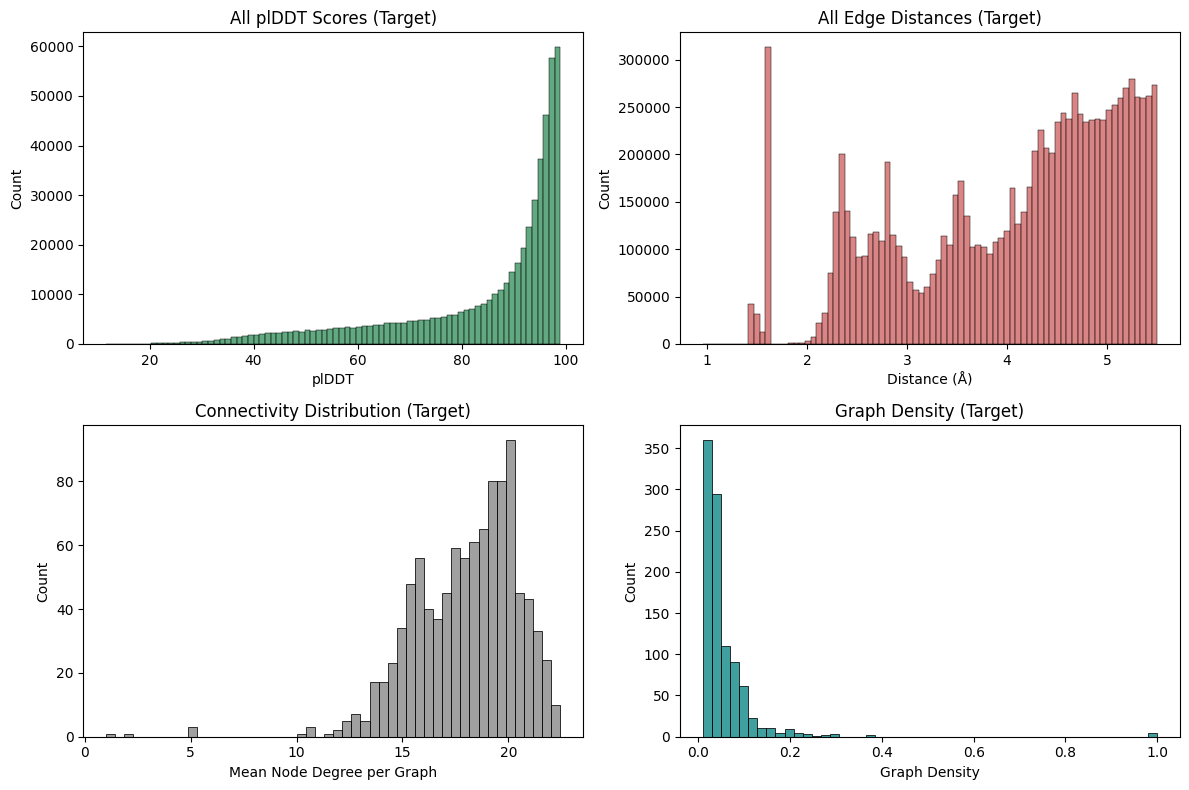

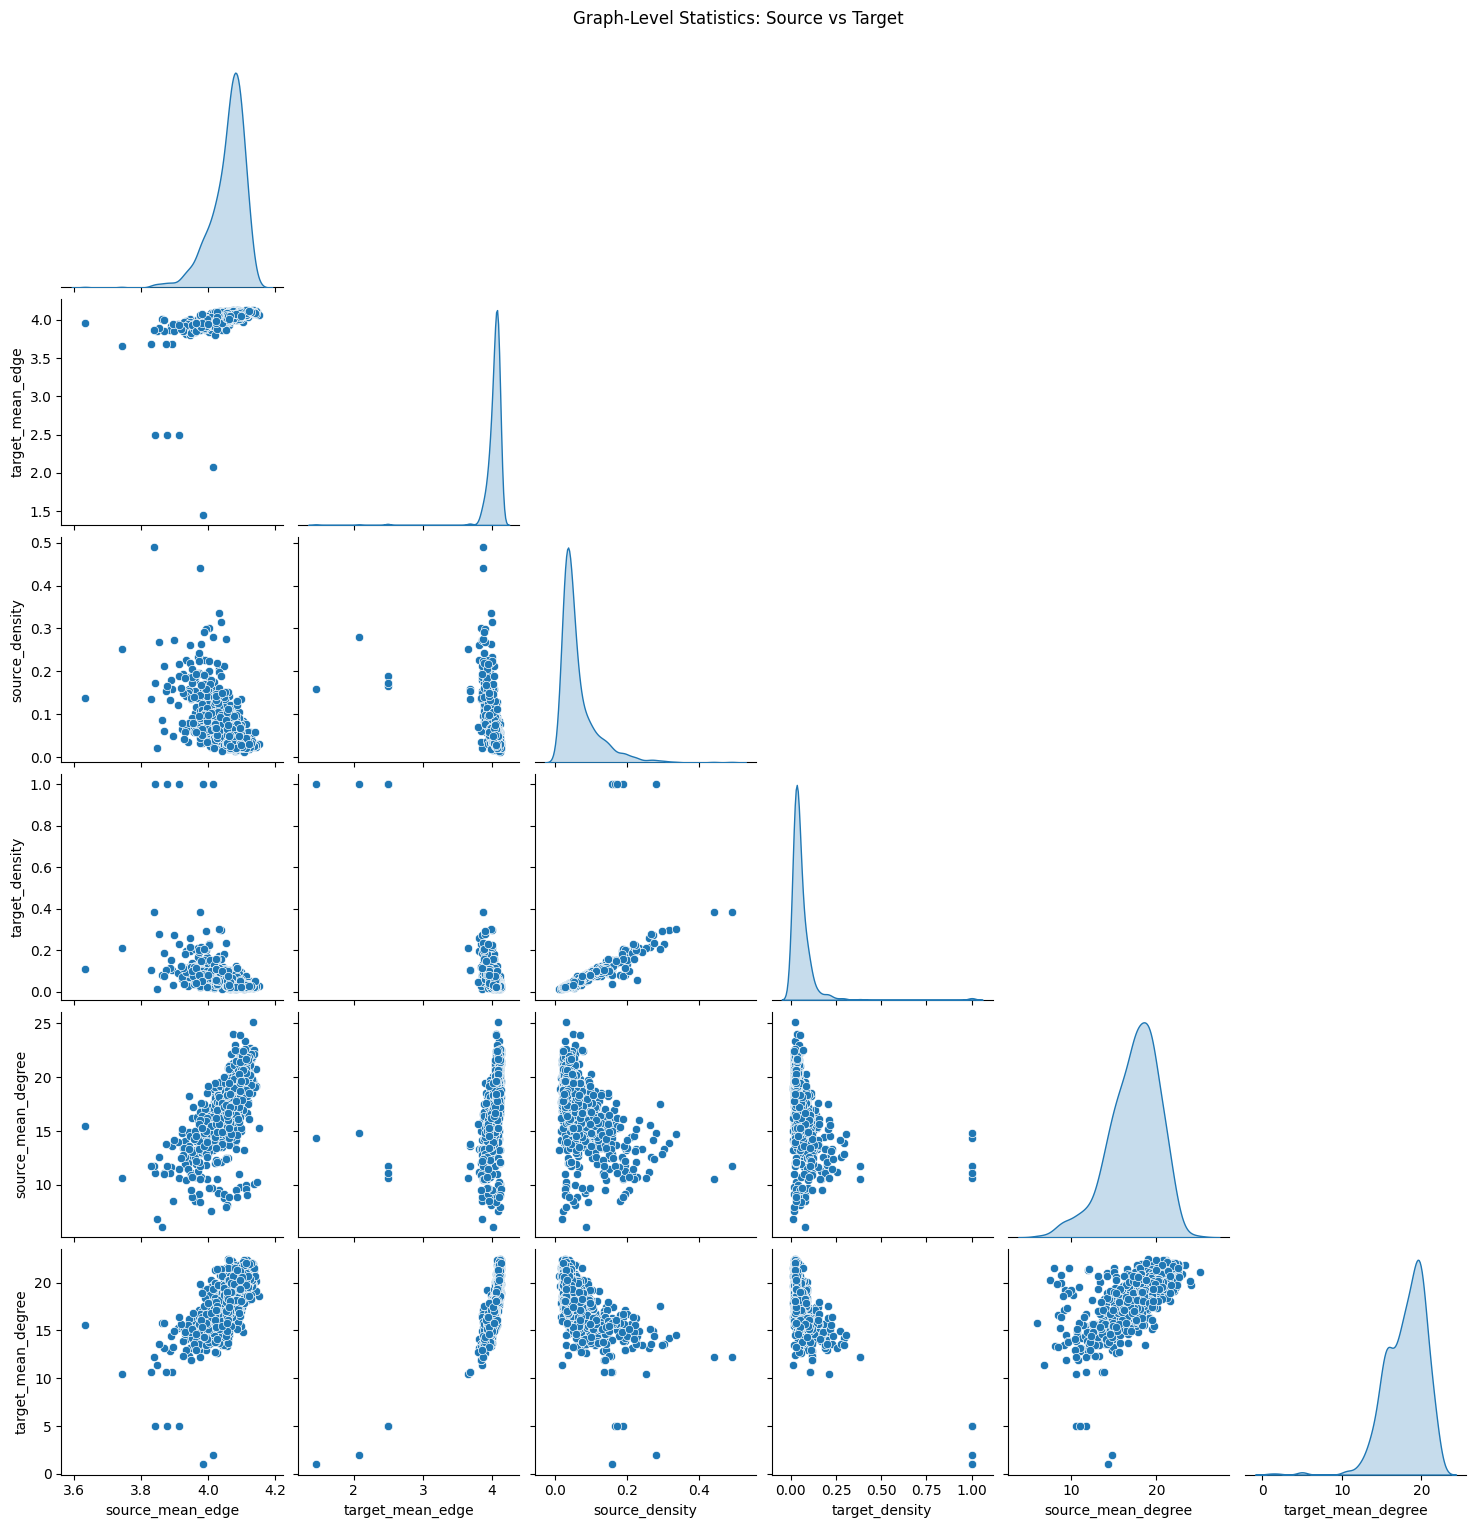

                    count    mean    std    min     25%     50%     75%  \
source_mean_edge    995.0   4.057  0.054  3.633   4.032   4.069   4.093   
target_mean_edge    995.0   4.026  0.149  1.453   4.003   4.055   4.083   
source_density      995.0   0.064  0.053  0.012   0.032   0.044   0.075   
target_density      995.0   0.057  0.080  0.010   0.026   0.035   0.063   
source_mean_degree  995.0  17.357  2.945  6.083  15.591  17.665  19.436   
target_mean_degree  995.0  18.024  2.508  1.000  16.339  18.415  19.865   

                       max  
source_mean_edge     4.152  
target_mean_edge     4.135  
source_density       0.490  
target_density       1.000  
source_mean_degree  25.141  
target_mean_degree  22.453  


In [4]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch_geometric.utils import degree
from tqdm import tqdm

def collect_source_stats(dataset):
    chem_shifts_all = []
    edge_dists_all = []
    mean_x = []
    mean_edge = []
    mean_degree = []
    density = []

    for data in tqdm(dataset):
        x = data.x_s.cpu().numpy().flatten()
        edge_attr = data.edge_attr_s.cpu().numpy().flatten()
        deg = degree(data.edge_index_s[0], num_nodes=data.x_s.size(0)).numpy()

        chem_shifts_all.append(x)
        edge_dists_all.append(edge_attr)
        mean_x.append(np.mean(x))
        mean_edge.append(np.mean(edge_attr))
        mean_degree.append(np.mean(deg))
        density.append(len(edge_attr) / (data.x_s.size(0) * (data.x_s.size(0) - 1)))

    return {
        "chem_shifts": np.concatenate(chem_shifts_all),
        "edge_dists": np.concatenate(edge_dists_all),
        "mean_x": np.array(mean_x),
        "mean_edge": np.array(mean_edge),
        "mean_degree": np.array(mean_degree),
        "density": np.array(density),
    }

def collect_target_stats(dataset):
    plDDT_all = []
    edge_dists_all = []
    mean_x = []
    mean_edge = []
    mean_degree = []
    density = []

    for data in tqdm(dataset):
        x = data.x_t.cpu().numpy().flatten()
        edge_attr = data.edge_attr_t.cpu().numpy().flatten()
        deg = degree(data.edge_index_t[0], num_nodes=data.x_t.size(0)).numpy()

        plDDT_all.append(x)
        edge_dists_all.append(edge_attr)
        mean_x.append(np.mean(x))
        mean_edge.append(np.mean(edge_attr))
        mean_degree.append(np.mean(deg))
        density.append(len(edge_attr) / (data.x_t.size(0) * (data.x_t.size(0) - 1)))

    return {
        "plDDT": np.concatenate(plDDT_all),
        "edge_dists": np.concatenate(edge_dists_all),
        "mean_x": np.array(mean_x),
        "mean_edge": np.array(mean_edge),
        "mean_degree": np.array(mean_degree),
        "density": np.array(density),
    }

source_stats = collect_source_stats(dataset)
target_stats = collect_target_stats(dataset)

## Distribution Plots (All Source Graphs)
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(source_stats["chem_shifts"], bins=80, color='steelblue')
plt.xlabel('Chemical Shift (ppm)')
plt.title('All Chemical Shifts (Source)')

plt.subplot(2,2,2)
sns.histplot(source_stats["edge_dists"], bins=80, color='darkorange')
plt.xlabel('Distance (Å)')
plt.title('All Edge Distances (Source)')

plt.subplot(2,2,3)
sns.histplot(source_stats["mean_degree"], bins=50, color='gray')
plt.xlabel('Mean Node Degree per Graph')
plt.title('Connectivity Distribution (Source)')

plt.subplot(2,2,4)
sns.histplot(source_stats["density"], bins=50, color='slateblue')
plt.xlabel('Graph Density')
plt.title('Graph Density (Source)')
plt.tight_layout()
plt.show()

## Distribution Plots (All Target Graphs)
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(target_stats["plDDT"], bins=80, color='seagreen')
plt.xlabel('plDDT')
plt.title('All plDDT Scores (Target)')

plt.subplot(2,2,2)
sns.histplot(target_stats["edge_dists"], bins=80, color='indianred')
plt.xlabel('Distance (Å)')
plt.title('All Edge Distances (Target)')

plt.subplot(2,2,3)
sns.histplot(target_stats["mean_degree"], bins=50, color='gray')
plt.xlabel('Mean Node Degree per Graph')
plt.title('Connectivity Distribution (Target)')

plt.subplot(2,2,4)
sns.histplot(target_stats["density"], bins=50, color='teal')
plt.xlabel('Graph Density')
plt.title('Graph Density (Target)')
plt.tight_layout()
plt.show()

## Summary Comparison (Source vs Target)
import pandas as pd

summary_df = pd.DataFrame({
    "source_mean_edge": source_stats["mean_edge"],
    "target_mean_edge": target_stats["mean_edge"],
    "source_density": source_stats["density"],
    "target_density": target_stats["density"],
    "source_mean_degree": source_stats["mean_degree"],
    "target_mean_degree": target_stats["mean_degree"],
})

sns.pairplot(summary_df, corner=True, diag_kind="kde")
plt.suptitle("Graph-Level Statistics: Source vs Target", y=1.02)
plt.show()

print(summary_df.describe().T.round(3))

## Pairwise Graphs Distributions Analysis

100%|██████████| 995/995 [01:29<00:00, 11.08it/s]


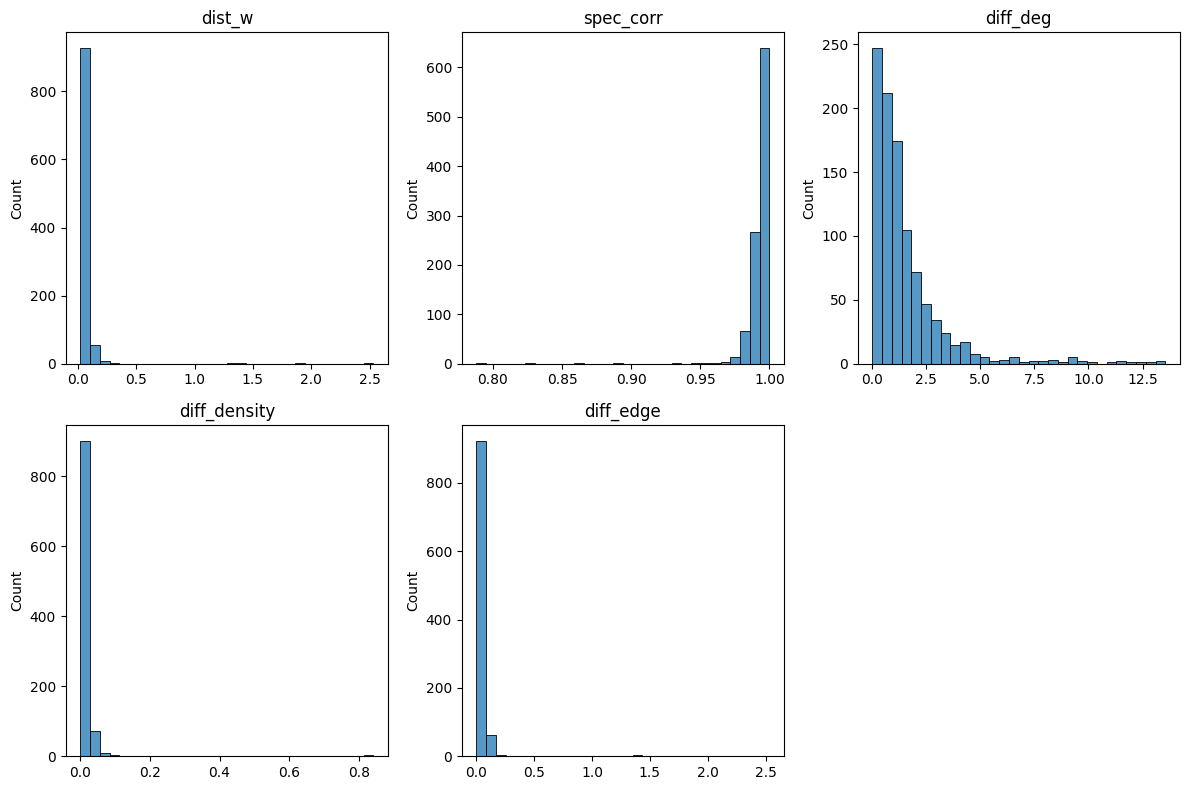

In [5]:
from scipy.stats import wasserstein_distance, pearsonr

def summarize_graph_stats(edge_index, edge_attr, num_nodes):
    deg = degree(edge_index[0], num_nodes=num_nodes).numpy()
    mean_deg = np.mean(deg)
    density = edge_index.size(1) / (num_nodes * (num_nodes - 1))
    edge_dist = edge_attr.cpu().numpy().flatten()
    return {
        "mean_deg": mean_deg,
        "density": density,
        "mean_edge_len": np.mean(edge_dist),
        "std_edge_len": np.std(edge_dist),
    }

def laplacian_spectrum(edge_index, edge_attr, num_nodes, k=50):
    # approximate: unweighted Laplacian eigenvalues
    A = torch.zeros((num_nodes, num_nodes))
    A[edge_index[0], edge_index[1]] = 1.0
    A[edge_index[1], edge_index[0]] = 1.0
    D = torch.diag(A.sum(1))
    L = D - A
    eigvals = torch.linalg.eigvalsh(L)
    eigvals = eigvals.cpu().numpy()
    return np.sort(eigvals)[:k]  # first k eigenvalues

# %%
def compare_graph_pair(data):
    n_s, n_t = data.x_s.size(0), data.x_t.size(0)
    stats_s = summarize_graph_stats(data.edge_index_s, data.edge_attr_s, n_s)
    stats_t = summarize_graph_stats(data.edge_index_t, data.edge_attr_t, n_t)

    # 1. Distributional distance between edge weights
    dist_w = wasserstein_distance(
        data.edge_attr_s.cpu().numpy().flatten(),
        data.edge_attr_t.cpu().numpy().flatten()
    )

    # 2. Laplacian spectral similarity
    eig_s = laplacian_spectrum(data.edge_index_s, data.edge_attr_s, n_s)
    eig_t = laplacian_spectrum(data.edge_index_t, data.edge_attr_t, n_t)
    spec_corr = pearsonr(
        np.interp(np.linspace(0, 1, len(eig_t)), np.linspace(0, 1, len(eig_s)), eig_s),
        eig_t
    )[0]

    # 3. High-level stats difference
    diff_deg = abs(stats_s["mean_deg"] - stats_t["mean_deg"])
    diff_density = abs(stats_s["density"] - stats_t["density"])
    diff_edge = abs(stats_s["mean_edge_len"] - stats_t["mean_edge_len"])

    return {
        "dist_w": dist_w,
        "spec_corr": spec_corr,
        "diff_deg": diff_deg,
        "diff_density": diff_density,
        "diff_edge": diff_edge,
    }

# %%
results = [compare_graph_pair(d) for d in tqdm(dataset)]
results = {k: np.array([r[k] for r in results]) for k in results[0].keys()}

# %%
plt.figure(figsize=(12,8))
num_plots = len(results)
for i, (k, v) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.histplot(v, bins=30)
    plt.title(k)
plt.tight_layout()
plt.show()

## Pairwise Graphs Comparison

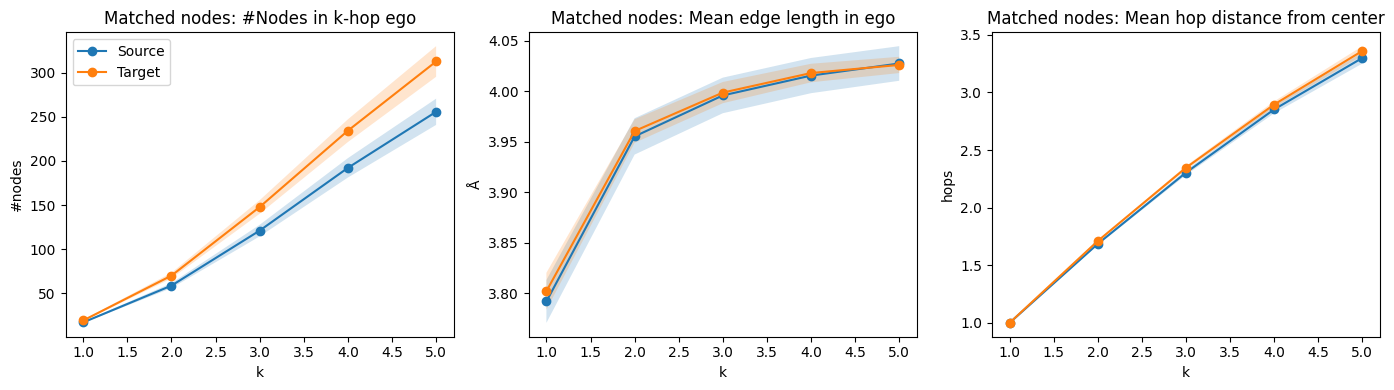

In [6]:
# # Neighborhood similarity around matched nodes
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.utils import k_hop_subgraph, degree

def ego_metrics(edge_index, edge_attr, num_nodes, center, k_max=3):
    """
    Returns dict of lists over k=1..k_max:
      - n_nodes[k]
      - mean_edge[k]
      - mean_sps[k] (mean shortest path from center to others using hop distance)
    """
    edge_index = edge_index.cpu()
    edge_attr  = edge_attr.view(-1).float().cpu()
    out = {"n_nodes": [], "mean_edge": [], "mean_sps": []}

    # Precompute unweighted adjacency (for hop distances)
    # We’ll use hop count as a proxy for path length; it’s robust + cheap.
    for k in range(1, k_max+1):
        nodes, sub_ei, mapping, _ = k_hop_subgraph(center, k, edge_index, relabel_nodes=True, num_nodes=num_nodes)
        if nodes.numel() == 0:
            out["n_nodes"].append(0)
            out["mean_edge"].append(np.nan)
            out["mean_sps"].append(np.nan)
            continue

        # Edge lengths in subgraph
        # Map original edges to subgraph indices
        mask = torch.isin(edge_index[0], nodes) & torch.isin(edge_index[1], nodes)
        sub_edges = edge_index[:, mask]
        sub_w = edge_attr[mask]

        # Relabel to [0..m-1]
        relabel = torch.full((num_nodes,), -1, dtype=torch.long)
        relabel[nodes] = torch.arange(nodes.numel(), dtype=torch.long)
        sub_i = relabel[sub_edges]

        # Mean edge length
        mean_edge = float(sub_w.mean().item()) if sub_w.numel() > 0 else np.nan

        # Mean shortest-path (in hops) from center to others (BFS over unweighted)
        m = nodes.numel()
        A = [[] for _ in range(m)]
        si, sj = sub_i
        for a, b in zip(si.tolist(), sj.tolist()):
            A[a].append(b); A[b].append(a)
        src = int(relabel[center])
        # BFS
        dist = [-1]*m
        dist[src] = 0
        q = [src]
        head = 0
        while head < len(q):
            u = q[head]; head += 1
            for v in A[u]:
                if dist[v] == -1:
                    dist[v] = dist[u] + 1
                    q.append(v)
        dists = [d for idx,d in enumerate(dist) if (idx != src and d >= 0)]
        mean_sps = float(np.mean(dists)) if len(dists) > 0 else np.nan

        out["n_nodes"].append(m)
        out["mean_edge"].append(mean_edge)
        out["mean_sps"].append(mean_sps)

    return out

def summarize_pairs(dataset, match_pairs, k_max=3, sample=None, which="source"):
    """
    dataset: iterable of Data objects with *_s / *_t
    match_pairs: list of tuples (graph_idx, node_s, node_t) indicating matched nodes
    sample: int or None -> subsample matched pairs for speed
    which: "source", "target"
    Returns dict of arrays for each metric with shape [num_pairs, k_max]
    """
    if sample is not None and len(match_pairs) > sample:
        rng = np.random.default_rng(0)
        match_pairs = list(rng.choice(match_pairs, size=sample, replace=False))

    all_n_nodes, all_mean_edge, all_mean_sps = [], [], []

    for gidx, i_s, i_t in match_pairs:
        d = dataset[gidx]
        if which == "source":
            ei, ea, n, center = d.edge_index_s, d.edge_attr_s, d.x_s.size(0), int(i_s)
        else:
            ei, ea, n, center = d.edge_index_t, d.edge_attr_t, d.x_t.size(0), int(i_t)
        met = ego_metrics(ei, ea, n, center, k_max=k_max)
        all_n_nodes.append(met["n_nodes"])
        all_mean_edge.append(met["mean_edge"])
        all_mean_sps.append(met["mean_sps"])

    def stack_clean(x):
        X = np.array(x, dtype=float)  # [num_pairs, k_max]
        return X

    return {
        "n_nodes": stack_clean(all_n_nodes),
        "mean_edge": stack_clean(all_mean_edge),
        "mean_sps": stack_clean(all_mean_sps),
    }

def plot_profile_with_ci(x, Y, label, ax):
    """
    x: 1..k_max
    Y: [num_pairs, k_max]
    """
    mu = np.nanmean(Y, axis=0)
    se = np.nanstd(Y, axis=0) / np.sqrt(np.sum(~np.isnan(Y), axis=0))
    ax.plot(x, mu, marker='o', label=label)
    ax.fill_between(x, mu - 1.96*se, mu + 1.96*se, alpha=0.2)

def plot_neighborhood_profiles(src_stats, tgt_stats, k_max=3, title_prefix=""):
    x = np.arange(1, k_max+1)
    fig, axs = plt.subplots(1, 3, figsize=(14,4), sharex=True)

    plot_profile_with_ci(x, src_stats["n_nodes"], "Source", axs[0])
    plot_profile_with_ci(x, tgt_stats["n_nodes"], "Target", axs[0])
    axs[0].set_title(f"{title_prefix} #Nodes in k-hop ego")
    axs[0].set_xlabel("k"); axs[0].set_ylabel("#nodes"); axs[0].legend()

    plot_profile_with_ci(x, src_stats["mean_edge"], "Source", axs[1])
    plot_profile_with_ci(x, tgt_stats["mean_edge"], "Target", axs[1])
    axs[1].set_title(f"{title_prefix} Mean edge length in ego")
    axs[1].set_xlabel("k"); axs[1].set_ylabel("Å")

    plot_profile_with_ci(x, src_stats["mean_sps"], "Source", axs[2])
    plot_profile_with_ci(x, tgt_stats["mean_sps"], "Target", axs[2])
    axs[2].set_title(f"{title_prefix} Mean hop distance from center")
    axs[2].set_xlabel("k"); axs[2].set_ylabel("hops")

    plt.tight_layout()
    plt.show()

# --- Example driver ---
# Build matched triplets (graph_idx, i_s, i_t).
# If you already have y-based matches, assemble them here. Example below assumes y’s are unique per graph.
def build_matches_from_y(dataset, max_pairs_per_graph=50):
    matches = []
    for gi, d in enumerate(dataset):
        # map y value -> index for source/target
        ys_s = d.y_s.cpu().numpy().tolist()
        ys_t = d.y_t.cpu().numpy().tolist()
        idx_s = {y:i for i,y in enumerate(ys_s)}
        cnt = 0
        for jt, y in enumerate(ys_t):
            if y in idx_s:
                matches.append((gi, idx_s[y], jt))
                cnt += 1
                if max_pairs_per_graph and cnt >= max_pairs_per_graph:
                    break
    return matches

# Usage:
matches = build_matches_from_y(dataset, max_pairs_per_graph=50)
src_stats = summarize_pairs(dataset, matches, k_max=5, sample=500, which="source")
tgt_stats = summarize_pairs(dataset, matches, k_max=5, sample=500, which="target")
plot_neighborhood_profiles(src_stats, tgt_stats, k_max=5, title_prefix="Matched nodes:")

Computing k-hop topology & geometry diffs: 100%|██████████| 5000/5000 [01:14<00:00, 66.81it/s]
/tmp/ipykernel_3831317/2718072866.py:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_per_k, labels=[str(k) for k in ks], showfliers=False)


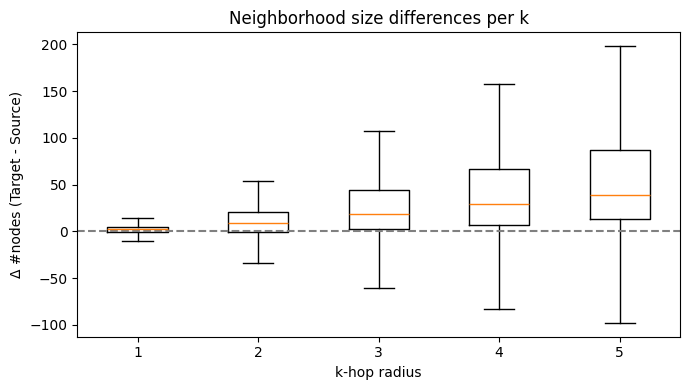


Summary for Δn (target - source):


,k,mean_n,median_n,IQR,N
0,1,2.2390,2.0,6.00,5000
1,2,10.8270,9.0,22.00,5000
2,3,24.5366,19.0,42.00,5000
3,4,39.7138,29.0,60.25,5000
4,5,53.4334,39.0,74.00,5000


/tmp/ipykernel_3831317/2718072866.py:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_per_k, labels=[str(k) for k in ks], showfliers=False)


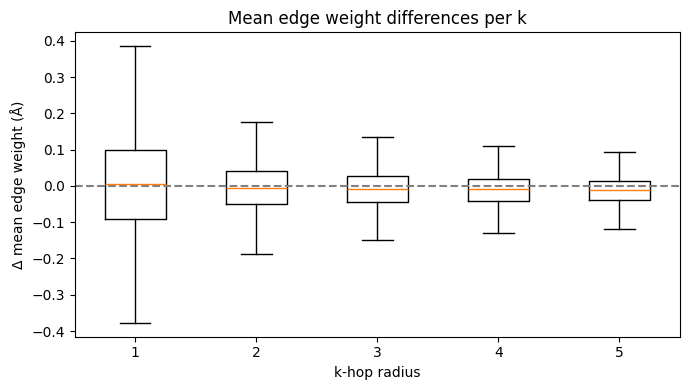


Summary for Δm (target - source):


,k,mean_m,median_m,IQR,N
0,1,0.004202,0.004192,0.190959,5000
1,2,-0.002445,-0.004930,0.090970,5000
2,3,-0.004564,-0.007128,0.071302,5000
3,4,-0.005682,-0.009254,0.059805,5000
4,5,-0.007047,-0.012268,0.053082,5000


In [7]:
# %% [markdown]
# # Direct matched-node comparison: k-hop neighborhood topology & geometry
#
# For each matched node pair (i_s, i_t) across all graph pairs:
#   - Compute for k = 1..k_max:
#       * n_s(k), n_t(k): #nodes in k-hop ego neighborhood
#       * m_s(k), m_t(k): mean edge weight (distance) inside k-hop ego
#   - Compute paired differences:
#       Δn_k = n_t(k) - n_s(k)
#       Δm_k = m_t(k) - m_s(k)
#
# Then plot per-k boxplots and print summary stats.
# This version handles large datasets via sampling (sample=N).

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch_geometric.utils import k_hop_subgraph
from tqdm import tqdm

# ==========================================================
# Utility functions
# ==========================================================

def build_matches_from_y(dataset, max_pairs_per_graph=None):
    """Build exact matches from y_s and y_t for each graph pair."""
    matches = []
    for gi, d in enumerate(dataset):
        ys_s = d.y_s.detach().cpu().numpy().ravel().tolist()
        ys_t = d.y_t.detach().cpu().numpy().ravel().tolist()
        s_pos = {}
        for i, y in enumerate(ys_s):
            s_pos.setdefault(y, []).append(i)
        cnt = 0
        for j, y in enumerate(ys_t):
            lst = s_pos.get(y, [])
            if lst:
                i_s = lst.pop(0)
                matches.append((gi, i_s, j))
                cnt += 1
                if max_pairs_per_graph and cnt >= max_pairs_per_graph:
                    break
    return matches

def ego_size(edge_index, num_nodes, center, k):
    """Return number of nodes in k-hop ego subgraph."""
    nodes, _, _, _ = k_hop_subgraph(center, k, edge_index, relabel_nodes=True, num_nodes=num_nodes)
    return int(nodes.numel())

def ego_mean_edge_weight(edge_index, edge_attr, num_nodes, center, k):
    """Return mean edge weight (distance) inside k-hop ego subgraph."""
    nodes, _, _, _ = k_hop_subgraph(center, k, edge_index, relabel_nodes=True, num_nodes=num_nodes)
    if nodes.numel() <= 1:
        return np.nan
    mask = torch.isin(edge_index[0], nodes) & torch.isin(edge_index[1], nodes)
    if mask.sum() == 0:
        return np.nan
    return float(edge_attr.view(-1)[mask].float().mean().item())

def compute_khop_diffs(dataset, matches, k_max=3, sample=None):
    """
    Compute both neighborhood-size and mean-edge-weight diffs for matched nodes.
    Returns DataFrame with columns:
      [graph_idx, i_s, i_t, k, n_s, n_t, m_s, m_t, diff_n, diff_m]
    """
    if sample and len(matches) > sample:
        rng = np.random.default_rng(0)
        matches = [matches[i] for i in rng.choice(len(matches), size=sample, replace=False)]

    rows = []
    for gi, i_s, i_t in tqdm(matches, desc="Computing k-hop topology & geometry diffs"):
        d = dataset[gi]
        ns, nt = d.x_s.size(0), d.x_t.size(0)
        for k in range(1, k_max + 1):
            # --- topology ---
            try:
                n_s = ego_size(d.edge_index_s, ns, int(i_s), k)
            except Exception:
                n_s = np.nan
            try:
                n_t = ego_size(d.edge_index_t, nt, int(i_t), k)
            except Exception:
                n_t = np.nan
            # --- geometry ---
            try:
                m_s = ego_mean_edge_weight(d.edge_index_s, d.edge_attr_s, ns, int(i_s), k)
            except Exception:
                m_s = np.nan
            try:
                m_t = ego_mean_edge_weight(d.edge_index_t, d.edge_attr_t, nt, int(i_t), k)
            except Exception:
                m_t = np.nan
            # --- differences ---
            diff_n = (n_t - n_s) if np.isfinite(n_s) and np.isfinite(n_t) else np.nan
            diff_m = (m_t - m_s) if np.isfinite(m_s) and np.isfinite(m_t) else np.nan
            rows.append({
                "graph_idx": gi, "i_s": i_s, "i_t": i_t, "k": k,
                "n_s": n_s, "n_t": n_t, "m_s": m_s, "m_t": m_t,
                "diff_n": diff_n, "diff_m": diff_m,
            })
    return pd.DataFrame(rows)

# ==========================================================
# Visualization helpers
# ==========================================================

def plot_diff_boxplots(df, col, ylabel, title):
    """Boxplots of paired differences per k."""
    ks = sorted(df["k"].dropna().unique().tolist())
    data_per_k = [df.loc[(df["k"]==k) & np.isfinite(df[col]), col].values for k in ks]
    plt.figure(figsize=(7,4))
    plt.boxplot(data_per_k, labels=[str(k) for k in ks], showfliers=False)
    plt.axhline(0.0, linestyle="--", color="gray")
    plt.xlabel("k-hop radius")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def print_diff_summary(df, col, label):
    """Print summary statistics (mean, median, IQR) per k."""
    ks = sorted(df["k"].dropna().unique().tolist())
    lines = []
    for k in ks:
        vals = df.loc[(df["k"]==k) & np.isfinite(df[col]), col].values
        if len(vals) == 0:
            lines.append((k, np.nan, np.nan, np.nan, 0))
        else:
            q25, med, q75 = np.percentile(vals, [25, 50, 75])
            lines.append((k, np.mean(vals), med, q75 - q25, len(vals)))
    out = pd.DataFrame(lines, columns=["k", f"mean_{label}", f"median_{label}", "IQR", "N"])
    print(f"\nSummary for Δ{label} (target - source):")
    display(out)

# ==========================================================
# Driver
# ==========================================================

# Build matches if not already done
# matches = build_matches_from_y(dataset, max_pairs_per_graph=200)

if len(matches) == 0:
    print("⚠️ No matched nodes found across the dataset. Check y_s / y_t alignment.")
else:
    diffs_df = compute_khop_diffs(dataset, matches, k_max=5, sample=5000)

    # --- Plot and summarize neighborhood-size differences ---
    plot_diff_boxplots(diffs_df, "diff_n",
                       ylabel="Δ #nodes (Target - Source)",
                       title="Neighborhood size differences per k")
    print_diff_summary(diffs_df, "diff_n", "n")

    # --- Plot and summarize mean edge-weight differences ---
    plot_diff_boxplots(diffs_df, "diff_m",
                       ylabel="Δ mean edge weight (Å)",
                       title="Mean edge weight differences per k")
    print_diff_summary(diffs_df, "diff_m", "m")

## Pairwise Matched Nodes Analysis

Analyzing non-matching counts:  11%|█         | 106/995 [00:00<00:00, 1053.77it/s]

Analyzing non-matching counts: 100%|██████████| 995/995 [00:00<00:00, 2380.68it/s]


,graph_idx,protein,num_nodes_source,num_nodes_target,matched_nodes,unmatched_source,unmatched_target,pct_unmatched_source,pct_unmatched_target,size_diff
0,0,2KWP,634,784,634,0,150,0.000000,0.191327,-150
1,1,1PA4,427,757,27,400,730,0.936768,0.964333,-330
2,2,2KFL,596,661,596,0,65,0.000000,0.098336,-65
3,3,2LRT,857,983,857,0,126,0.000000,0.128179,-126
4,4,2LBX,494,758,494,0,264,0.000000,0.348285,-264
...,...,...,...,...,...,...,...,...,...,...
990,990,2KXI,794,929,794,0,135,0.000000,0.145318,-135
991,991,1V5S,705,803,705,0,98,0.000000,0.122042,-98
992,992,2KI9,197,220,197,0,23,0.000000,0.104545,-23
993,993,1I11,390,584,6,384,578,0.984615,0.989726,-194



Summary:


,count,mean,std,min,25%,50%,75%,max
graph_idx,995.0,497.000000,287.376060,0.000000,248.50000,497.000000,745.500000,994.0
num_nodes_source,995.0,416.761809,238.563690,25.000000,210.50000,405.000000,596.500000,1269.0
num_nodes_target,995.0,526.969849,299.454550,2.000000,253.00000,527.000000,728.500000,1827.0
matched_nodes,995.0,357.590955,253.963036,0.000000,128.50000,329.000000,549.000000,1181.0
unmatched_source,995.0,59.170854,173.007324,0.000000,0.00000,0.000000,0.000000,1181.0
unmatched_target,995.0,169.378894,231.346688,1.000000,44.00000,84.000000,161.000000,1695.0
pct_unmatched_source,995.0,0.120667,0.309538,0.000000,0.00000,0.000000,0.000000,1.0
pct_unmatched_target,995.0,0.289165,0.273573,0.021021,0.12309,0.178882,0.300218,1.0
size_diff,995.0,-110.208040,108.963749,-1007.000000,-140.50000,-80.000000,-43.500000,90.0


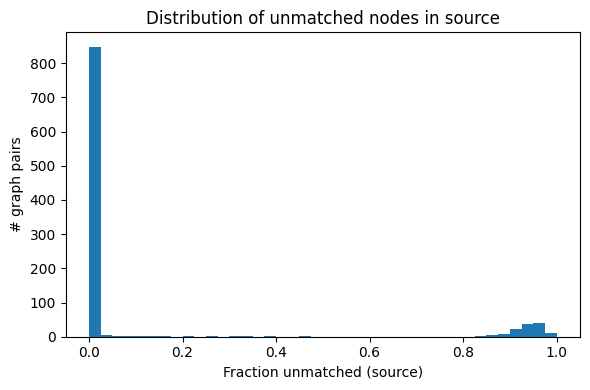

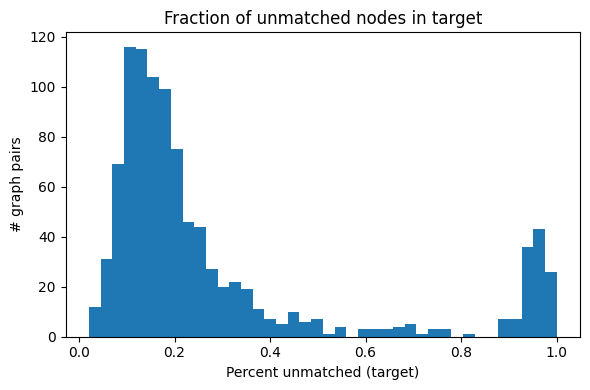

In [10]:
# %% [markdown]
# # Non-matching node counts per graph pair
# For each Data object, compare y_s vs y_t (as multisets).
# - unmatched_source: nodes in source without a counterpart in target
# - unmatched_target: nodes in target without a counterpart in source
# - matched_nodes: number of IDs matched (accounting for duplicates)
# Also records totals and percentages, then saves a CSV and plots histograms.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

def multiset_match_stats(y_s_arr, y_t_arr):
    """
    Multiset-aware matching stats for two arrays of IDs.
    Returns (matched_nodes, unmatched_source, unmatched_target).
    """
    cs = Counter(y_s_arr.tolist())
    ct = Counter(y_t_arr.tolist())
    # matched is sum of per-ID minima
    matched = sum(min(cs[k], ct.get(k, 0)) for k in cs.keys() | ct.keys())
    # unmatched are the leftovers
    unmatched_source = sum(max(0, cs[k] - ct.get(k, 0)) for k in cs)
    unmatched_target = sum(max(0, ct[k] - cs.get(k, 0)) for k in ct)
    return matched, unmatched_source, unmatched_target

rows = []
for gi, d in enumerate(tqdm(dataset, desc="Analyzing non-matching counts")):
    ys = d.y_s.detach().cpu().numpy().ravel()
    yt = d.y_t.detach().cpu().numpy().ravel()
    n_s = ys.size
    n_t = yt.size
    p = d.protein
    matched, unmatched_s, unmatched_t = multiset_match_stats(ys, yt)

    rows.append({
        "graph_idx": gi,
        "protein": p,
        "num_nodes_source": int(n_s),
        "num_nodes_target": int(n_t),
        "matched_nodes": int(matched),
        "unmatched_source": int(unmatched_s),
        "unmatched_target": int(unmatched_t),
        "pct_unmatched_source": float(unmatched_s / n_s) if n_s > 0 else np.nan,
        "pct_unmatched_target": float(unmatched_t / n_t) if n_t > 0 else np.nan,
        "size_diff": int(n_s - n_t),
    })

nm_df = pd.DataFrame(rows)
display(nm_df)
print("\nSummary:")
display(nm_df.describe().T)


# --- Quick visualizations ---
# Histogram: percent unmatched in source
plt.figure(figsize=(6,4))
plt.hist(nm_df["pct_unmatched_source"].dropna().values, bins=40)
plt.xlabel("Fraction unmatched (source)")
plt.ylabel("# graph pairs")
plt.title("Distribution of unmatched nodes in source")
plt.tight_layout()
plt.show()

# Histogram: percent unmatched in target
plt.figure(figsize=(6,4))
plt.hist(nm_df["pct_unmatched_target"].dropna().values, bins=40)
plt.xlabel("Percent unmatched (target)")
plt.ylabel("# graph pairs")
plt.title("Fraction of unmatched nodes in target")
plt.tight_layout()
plt.show()

In [9]:
# %% [markdown]
# # Flatten dataset into a Pandas DataFrame (node-level table)
#
# Each row corresponds to a single node in either the source or target graph.
# Columns include:
#   graph_idx  : integer index of the graph pair
#   domain     : 'source' or 'target'
#   node_idx   : local node index within that graph
#   y          : integer identifier (used for matching)
#   x          : node feature value (chemical shift or plDDT)
#   label      : atom label (e.g., 'HB2 MET 1')
# Additional attributes can easily be added.

import pandas as pd
import torch
from tqdm import tqdm

def dataset_to_node_dataframe(dataset):
    """
    Flatten the dataset into a single pandas DataFrame.
    Returns columns:
      graph_idx, domain, node_idx, y, x, label
    """
    rows = []

    for gi, data in enumerate(tqdm(dataset, desc="Flattening dataset")):
        # --- Source nodes ---
        x_s = data.x_s.detach().cpu().numpy().ravel()
        y_s = data.y_s.detach().cpu().numpy().ravel()
        labels_s = [str(l) for l in data.label_s]

        for ni, (x_val, y_val, lbl) in enumerate(zip(x_s, y_s, labels_s)):
            rows.append({
                "graph_idx": gi,
                "domain": "source",
                "x": x_val,
                "y": int(y_val),
                "label": lbl,
            })

        # --- Target nodes ---
        x_t = data.x_t.detach().cpu().numpy().ravel()
        y_t = data.y_t.detach().cpu().numpy().ravel()
        labels_t = [str(l) for l in data.label_t]

        for ni, (x_val, y_val, lbl) in enumerate(zip(x_t, y_t, labels_t)):
            rows.append({
                "graph_idx": gi,
                "domain": "target",
                "x": x_val,
                "y": int(y_val),
                "label": lbl,
            })

    df = pd.DataFrame(rows)
    return df

# ---------------------------------------------------------
# Driver
# ---------------------------------------------------------
node_df = dataset_to_node_dataframe(dataset)

# Quick sanity check
display(node_df)
print(f"Created DataFrame with {len(node_df):,} rows ({node_df['domain'].value_counts().to_dict()})")

Flattening dataset: 100%|██████████| 995/995 [00:00<00:00, 2152.47it/s]


,graph_idx,domain,x,y,label
0,0,source,2.140000,380,HB2 MET 1
1,0,source,4.180000,213,HA MET 1
2,0,source,2.270000,475,HB3 MET 1
3,0,source,9.020000,23,H ASN 2
4,0,source,4.980000,151,HA ASN 2
...,...,...,...,...,...
939008,994,target,60.200001,691,HE22 GLN 123
939009,994,target,76.650002,98,H SER 124
939010,994,target,74.580002,217,HA SER 124
939011,994,target,67.750000,368,HB2 SER 124


Created DataFrame with 939,013 rows ({'target': 524335, 'source': 414678})
